In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.linalg import inv 
# import mypkg.my2DPlotB

In [9]:
  
def  eval_lin_spline(xeval,Neval,a,b,f,Nint):

    '''create the intervals for piecewise approximations'''
    xint = np.linspace(a,b,Nint+1)
   
    '''create vector to store the evaluation of the linear splines'''
    yeval = np.zeros(Neval) 
    
    for jint in range(Nint):
        '''find indices of xeval in interval (xint(jint),xint(jint+1))'''
        '''let ind denote the indices in the intervals'''
        '''let n denote the length of ind'''
        
        '''temporarily store your info for creating a line in the interval of 
         interest'''
        a1= xint(jint)
        fa1 = f(a1)
        b1 = xint(jint+1)
        fb1 = f(b1)
        
        for kk in range(n):
           '''use your line evaluator to evaluate the lines at each of the points 
           in the interval'''
           '''yeval(ind(kk)) = call your line evaluator at xeval(ind(kk)) with 
           the points (a1,fa1) and (b1,fb1)'''
           
           
def  eval_monomial(xeval,coef,N,Neval):

    yeval = coef[0]*np.ones(Neval+1)
    
#    print('yeval = ', yeval)
    
    for j in range(1,N+1):
      for i in range(Neval+1):
#        print('yeval[i] = ', yeval[i])
#        print('a[j] = ', a[j])
#        print('i = ', i)
#        print('xeval[i] = ', xeval[i])
        yeval[i] = yeval[i] + coef[j]*xeval[i]**j

    return yeval

   
def Vandermonde(xint,N):

    V = np.zeros((N+1,N+1))
    
    ''' fill the first column'''
    for j in range(N+1):
       V[j][0] = 1.0

    for i in range(1,N+1):
        for j in range(N+1):
           V[j][i] = xint[j]**i

    return V  

def eval_lagrange(xeval,xint,yint,N):

    lj = np.ones(N+1)
    
    for count in range(N+1):
       for jj in range(N+1):
           if (jj != count):
              lj[count] = lj[count]*(xeval - xint[jj])/(xint[count]-xint[jj])

    yeval = 0.
    
    for jj in range(N+1):
       yeval = yeval + yint[jj]*lj[jj]
  
    return(yeval)

''' create divided difference matrix'''
def dividedDiffTable(x, y, n):
 
    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
                                     (x[j] - x[i + j]));
    return y;
    
def evalDDpoly(xval, xint,y,N):
    ''' evaluate the polynomial terms'''
    ptmp = np.zeros(N+1)
    
    ptmp[0] = 1.
    for j in range(N):
      ptmp[j+1] = ptmp[j]*(xval-xint[j])
     
    '''evaluate the divided difference polynomial'''
    yeval = 0.
    for j in range(N+1):
       yeval = yeval + y[0][j]*ptmp[j]  

    return yeval              


In [88]:
def f(x):
    return 1/(1+(10*x)**2)


a = -1
b = 1;
N = 10
h = 1/(N - 1)
j = np.arange(0, N + 1, 1)

xeval = j
Neval = N


''' Create interpolation nodes'''
xint = -1 + (j - 1)*h

'''Create interpolation data'''
yint = f(xint)

''' Create the Vandermonde matrix'''
V = Vandermonde(xint,N)

''' Invert the Vandermonde matrix'''    
Vinv = inv(V)

''' Apply inverse to rhs'''
''' to create the coefficients'''
coef = Vinv @ yint

yevalMon = eval_monomial(xeval, coef, N, Neval)

yevalLag = np.zeros(N)
for i in range(N - 1):
    yevalLag[i] = eval_lagrange(i, xint, yint, N)


yevaldivDiff = dividedDiffTable



In [66]:
yevalLag

1.0

err =  4.668289142049867e+16


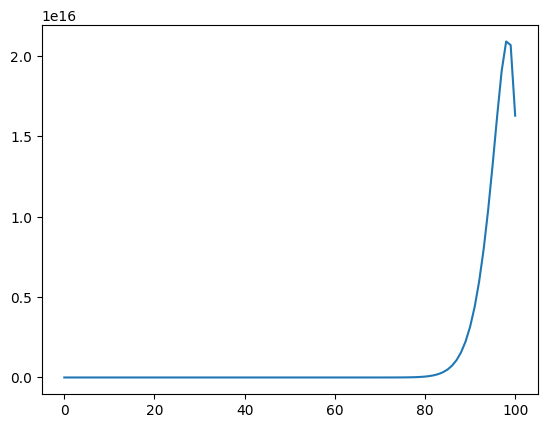

In [90]:
import numpy as np
import numpy.linalg as la
from numpy.linalg import inv
from numpy.linalg import norm

def driver(): 

    f = lambda x: 1/(1+(10*x)**2)
    
    N = 1000
    a = -1
    b = 1

    h = 1/(N - 1)
    j = np.arange(0, N + 1, 1)

    xeval = j
    Neval = N

    # xint = -1 + (j - 1)*h
    
    ''' Create interpolation nodes'''
    xint = -1 + (j - 1)*h
#    print('xint =',xint)
    '''Create interpolation data'''
    yint = f(xint)
#    print('yint =',yint)
    
    ''' Create the Vandermonde matrix'''
    V = Vandermonde(xint,N)
#    print('V = ',V)

    ''' Invert the Vandermonde matrix'''    
    Vinv = inv(V)
#    print('Vinv = ' , Vinv)
    
    ''' Apply inverse to rhs'''
    ''' to create the coefficients'''
    coef = Vinv @ yint
    
#    print('coef = ', coef)

# No validate the code
    Neval = 100    
    xeval = np.linspace(a,b,Neval+1)
    yeval = eval_monomial(xeval,coef,N,Neval)
    plt.plot(yeval)

# exact function
    yex = f(xeval)
    
    err =  norm(yex-yeval) 
    print('err = ', err)
    
    return

def  eval_monomial(xeval,coef,N,Neval):

    yeval = coef[0]*np.ones(Neval+1)
    
#    print('yeval = ', yeval)
    
    for j in range(1,N+1):
      for i in range(Neval+1):
#        print('yeval[i] = ', yeval[i])
#        print('a[j] = ', a[j])
#        print('i = ', i)
#        print('xeval[i] = ', xeval[i])
        yeval[i] = yeval[i] + coef[j]*xeval[i]**j

    return yeval

   
def Vandermonde(xint,N):

    V = np.zeros((N+1,N+1))
    
    ''' fill the first column'''
    for j in range(N+1):
       V[j][0] = 1.0

    for i in range(1,N+1):
        for j in range(N+1):
           V[j][i] = xint[j]**i

    return V     

driver()    


C:\Users\maddr\AppData\Local\Temp\ipykernel_17240\3486818052.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


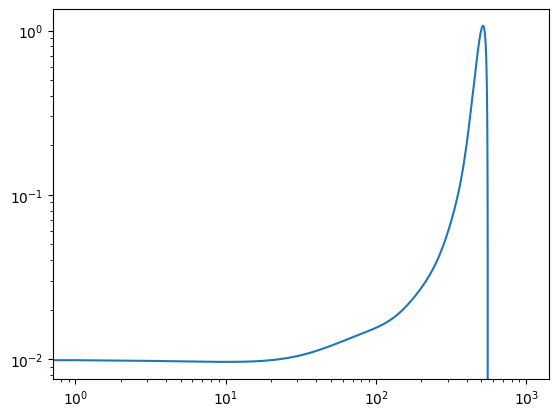

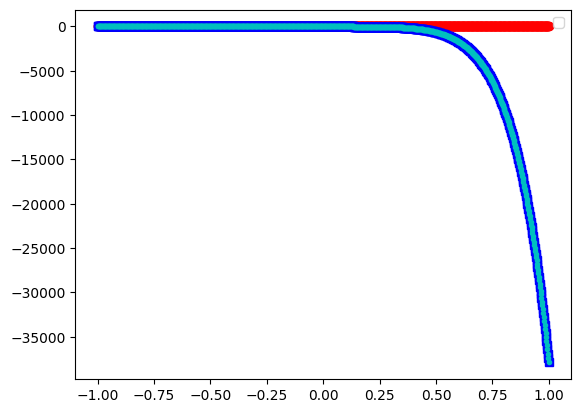

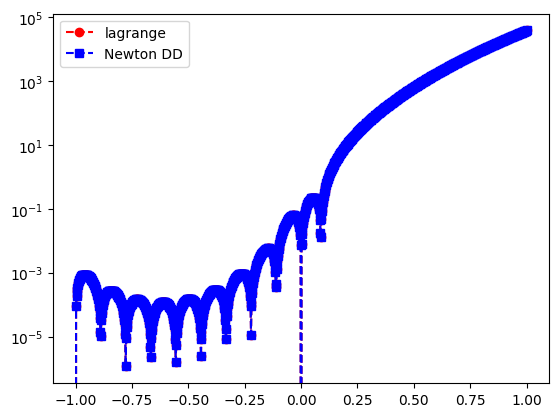

In [91]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def driver():


    f = lambda x: 1/(1+(10*x)**2)

    N = 10
    ''' interval'''
    a = -1
    b = 1
    h = 1/(N - 1)
    k = np.arange(0, 10 + 1, 1)
   
   
    ''' create equispaced interpolation nodes'''
    xint = -1 + (k - 1)*h
    
    ''' create interpolation data'''
    yint = f(xint)
    
    ''' create points for evaluating the Lagrange interpolating polynomial'''
    Neval = 1000
    xeval = np.linspace(a,b,Neval+1)
    yeval_l= np.zeros(Neval+1)
    yeval_dd = np.zeros(Neval+1)
  
    '''Initialize and populate the first columns of the 
     divided difference matrix. We will pass the x vector'''
    y = np.zeros( (N+1, N+1) )
     
    for j in range(N+1):
       y[j][0]  = yint[j]

    y = dividedDiffTable(xint, y, N+1)
    ''' evaluate lagrange poly '''
    for kk in range(Neval+1):
       yeval_l[kk] = eval_lagrange(xeval[kk],xint,yint,N)
       yeval_dd[kk] = evalDDpoly(xeval[kk],xint,y,N)
          
    plt.loglog(yeval_l)
    


    ''' create vector with exact values'''
    fex = f(xeval)
       

    plt.figure()    
    plt.plot(xeval,fex,'ro-')
    plt.plot(xeval,yeval_l,'bs--') 
    plt.plot(xeval,yeval_dd,'c.--')
    plt.legend()

    plt.figure() 
    err_l = abs(yeval_l-fex)
    err_dd = abs(yeval_dd-fex)
    plt.semilogy(xeval,err_l,'ro--',label='lagrange')
    plt.semilogy(xeval,err_dd,'bs--',label='Newton DD')
    plt.legend()
    plt.show()

def eval_lagrange(xeval,xint,yint,N):

    lj = np.ones(N+1)
    
    for count in range(N+1):
       for jj in range(N+1):
           if (jj != count):
              lj[count] = lj[count]*(xeval - xint[jj])/(xint[count]-xint[jj])

    yeval = 0.
    
    for jj in range(N+1):
       yeval = yeval + yint[jj]*lj[jj]
  
    return(yeval)
  
    


''' create divided difference matrix'''
def dividedDiffTable(x, y, n):
 
    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
                                     (x[j] - x[i + j]));
    return y;
    
def evalDDpoly(xval, xint,y,N):
    ''' evaluate the polynomial terms'''
    ptmp = np.zeros(N+1)
    
    ptmp[0] = 1.
    for j in range(N):
      ptmp[j+1] = ptmp[j]*(xval-xint[j])
     
    '''evaluate the divided difference polynomial'''
    yeval = 0.
    for j in range(N+1):
       yeval = yeval + y[0][j]*ptmp[j]  

    return yeval
   

driver()        


Using Lagrange polynomials and Newton-Divided differences works better than monomial. There is a lot of error in the monomial expansion method. The error is 15 orders of magnitude between monomial expansion and newton/lagrange.

I spend most of the lab trying to get my own code to work before transitioning to the provided code.